In [75]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [76]:
bike = pd.read_csv('../Datasets/comp_bikes_mod.csv')

In [77]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     15641 non-null  float64
 1   dteday      15641 non-null  object 
 2   season      15641 non-null  float64
 3   yr          15641 non-null  float64
 4   mnth        15641 non-null  float64
 5   hr          15641 non-null  float64
 6   holiday     15641 non-null  float64
 7   weekday     15641 non-null  float64
 8   workingday  15641 non-null  float64
 9   weathersit  15641 non-null  float64
 10  temp        15641 non-null  float64
 11  atemp       15641 non-null  float64
 12  hum         15641 non-null  float64
 13  windspeed   15641 non-null  float64
 14  casual      15641 non-null  float64
 15  registered  15641 non-null  float64
 16  cnt         15641 non-null  float64
dtypes: float64(16), object(1)
memory usage: 2.3+ MB


In [78]:
bike.shape

(17379, 17)

In [79]:
porcentagem = np.round((bike.isnull()['temp'].sum() / bike['temp'].count()) * 100 )
print("{} % dos dados da temperatura são nulos".format(porcentagem), "\n",
     bike['temp'].isnull().value_counts(normalize = True))

11.0 % dos dados da temperatura são nulos 
 False    0.899994
True     0.100006
Name: temp, dtype: float64


In [80]:
dtedayNotNull = bike[bike.isnull().dteday == False]
dtedayNotNull

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
1,2.0,2011-01-01,1.0,0.0,1.0,1.0,0.0,6.0,0.0,NaN,0.22,0.2727,0.80,0.0000,8.0,32.0,40.0
2,3.0,2011-01-01,1.0,0.0,1.0,2.0,0.0,6.0,0.0,1.0,0.22,0.2727,0.80,0.0000,5.0,27.0,32.0
3,4.0,2011-01-01,1.0,0.0,1.0,3.0,0.0,6.0,0.0,1.0,0.24,0.2879,0.75,0.0000,3.0,10.0,13.0
4,5.0,2011-01-01,1.0,0.0,1.0,4.0,0.0,6.0,NaN,1.0,0.24,0.2879,0.75,0.0000,0.0,1.0,1.0
5,6.0,2011-01-01,1.0,0.0,1.0,5.0,0.0,6.0,0.0,2.0,0.24,0.2576,0.75,0.0896,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17373,17374.0,2012-12-31,1.0,1.0,12.0,18.0,0.0,1.0,1.0,2.0,0.26,NaN,0.48,0.1343,10.0,112.0,122.0
17374,17375.0,2012-12-31,NaN,1.0,12.0,19.0,0.0,1.0,1.0,2.0,0.26,0.2576,0.60,0.1642,11.0,108.0,119.0
17375,17376.0,2012-12-31,1.0,1.0,12.0,20.0,0.0,1.0,1.0,2.0,0.26,0.2576,0.60,0.1642,NaN,NaN,89.0
17377,NaN,2012-12-31,1.0,1.0,NaN,NaN,0.0,1.0,1.0,1.0,0.26,0.2727,0.56,0.1343,13.0,48.0,61.0


In [81]:
dtedayNotNull['temp'].describe()

count    14066.000000
mean         0.496926
std          0.192971
min          0.020000
25%          0.340000
50%          0.500000
75%          0.660000
max          1.000000
Name: temp, dtype: float64

In [82]:
dtedayNotNull['windspeed'].describe()

count    14082.000000
mean         0.189552
std          0.122309
min          0.000000
25%          0.104500
50%          0.164200
75%          0.253700
max          0.850700
Name: windspeed, dtype: float64

In [83]:
seasons = dtedayNotNull['season'].astype('category')
seasons.cat.categories.tolist()

[1.0, 2.0, 3.0, 4.0]

In [84]:
# Ambos os resultados são os mesmos
datetimeCat = dtedayNotNull['dteday'].astype("datetime64[D]")
datetimeCat.describe()

pd.to_datetime(dtedayNotNull['dteday']).describe()

count                   15641
unique                    731
top       2011-06-04 00:00:00
freq                       24
first     2011-01-01 00:00:00
last      2012-12-31 00:00:00
Name: dteday, dtype: object

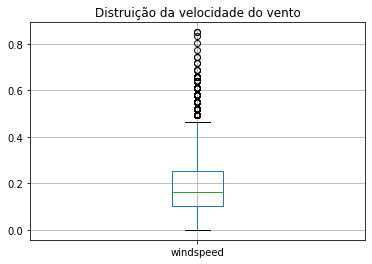

count    14082.000000
mean         0.189552
std          0.122309
min          0.000000
25%          0.104500
50%          0.164200
75%          0.253700
max          0.850700
Name: windspeed, dtype: float64

In [85]:
dtedayNotNull.boxplot('windspeed')
plt.title('Distruição da velocidade do vento')
plt.show()
dtedayNotNull['windspeed'].describe()

In [280]:
dtedayNotNull.corr()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,1.000000,0.407970,0.866207,0.488959,-0.008643,0.014597,-0.001126,-0.010626,-0.020270,0.141681,0.141808,0.007919,-0.072738,0.167456,0.288272,0.282132
season,0.407970,1.000000,-0.005610,0.830177,-0.004903,-0.006846,0.005788,0.011555,-0.013153,0.311273,0.319559,0.146984,-0.149802,0.123779,0.173305,0.179190
yr,0.866207,-0.005610,1.000000,-0.010337,-0.006261,0.007763,-0.008526,-0.000958,-0.026142,0.040857,0.037290,-0.082335,-0.010422,0.141733,0.258888,0.252729
mnth,0.488959,0.830177,-0.010337,1.000000,-0.005681,0.021196,0.018991,-0.004235,0.002774,0.202203,0.210337,0.158109,-0.126643,0.074406,0.127226,0.129162
hr,-0.008643,-0.004903,-0.006261,-0.005681,1.000000,0.009332,-0.010738,-0.003002,-0.023388,0.142102,0.136946,-0.277403,0.140474,0.303261,0.371388,0.391391
holiday,0.014597,-0.006846,0.007763,0.021196,0.009332,1.000000,-0.099102,-0.250450,-0.018945,-0.031273,-0.037606,-0.008809,0.008267,0.014519,-0.050193,-0.036150
weekday,-0.001126,0.005788,-0.008526,0.018991,-0.010738,-0.099102,1.000000,0.038821,0.004393,-0.004478,-0.011512,-0.035510,0.011014,0.025301,0.020142,0.021396
workingday,-0.010626,0.011555,-0.000958,-0.004235,-0.003002,-0.250450,0.038821,1.000000,0.050468,0.053113,0.055287,0.017469,-0.010926,-0.300811,0.130360,0.028170
weathersit,-0.020270,-0.013153,-0.026142,0.002774,-0.023388,-0.018945,0.004393,0.050468,1.000000,-0.101245,-0.105254,0.418574,0.025729,-0.152335,-0.118396,-0.141622
temp,0.141681,0.311273,0.040857,0.202203,0.142102,-0.031273,-0.004478,0.053113,-0.101245,1.000000,0.988102,-0.069887,-0.016022,0.458735,0.329653,0.405867


É interessante reparar que a tabela de correlação não possui o campo 'dteday', uma vez que o mesmo é
um campo de data e, portanto, não aplicável a correlação dessa maneira

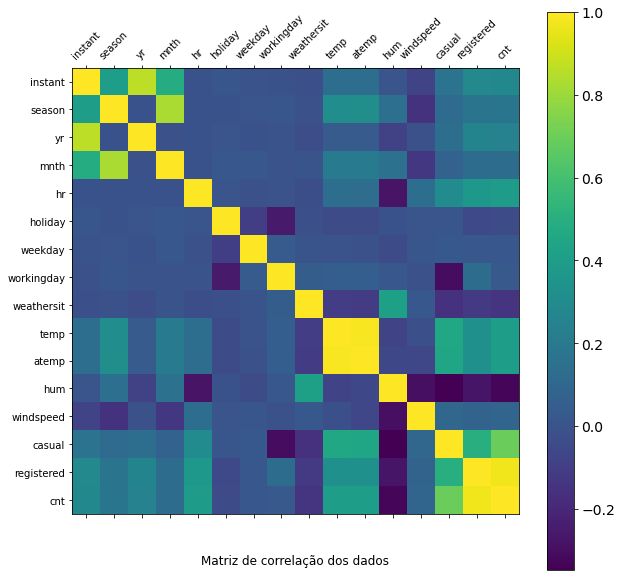

In [310]:
f = plt.figure(figsize=(10, 10))
plt.matshow(dtedayNotNull.corr(), f.number)
plt.yticks(np.arange(16), dtedayNotNull.corr().columns)
plt.xticks(np.arange(16), dtedayNotNull.corr().columns, rotation =45)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Matriz de correlação dos dados', y = -0.125)
plt.show()

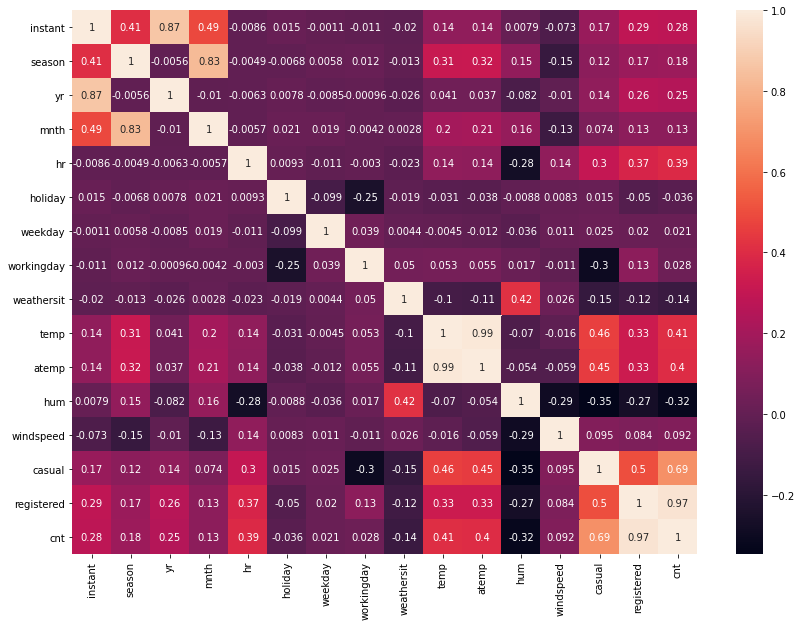

In [311]:
import seaborn as sbrn
plt.figure(figsize=(14,10))
sbrn.heatmap(dtedayNotNull.corr(), annot = True)

In [139]:
newBike = bike.copy(deep= True)
newBike[newBike.isnull().hum == True]

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
6,7.0,2011-01-01,1.0,0.0,1.0,NaN,0.0,6.0,0.0,1.0,0.22,0.2727,NaN,NaN,2.0,0.0,2.0
13,14.0,2011-01-01,1.0,0.0,1.0,NaN,0.0,6.0,0.0,2.0,0.46,0.4545,NaN,0.2985,47.0,47.0,94.0
41,42.0,2011-01-02,1.0,0.0,NaN,18.0,0.0,0.0,0.0,2.0,0.36,NaN,NaN,0.3284,10.0,43.0,53.0
52,53.0,2011-01-03,1.0,NaN,1.0,7.0,0.0,1.0,1.0,1.0,0.14,0.1364,NaN,0.1940,1.0,63.0,64.0
60,61.0,2011-01-03,1.0,0.0,1.0,15.0,0.0,1.0,NaN,1.0,0.26,0.2424,NaN,0.2537,14.0,58.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17340,17341.0,2012-12-30,1.0,1.0,12.0,9.0,0.0,0.0,0.0,1.0,0.24,0.2121,NaN,NaN,9.0,65.0,74.0
17341,17342.0,2012-12-30,1.0,1.0,12.0,10.0,0.0,0.0,NaN,1.0,0.26,0.2121,NaN,0.5821,31.0,91.0,122.0
17343,17344.0,2012-12-30,1.0,NaN,NaN,12.0,0.0,0.0,0.0,NaN,0.28,0.2273,NaN,0.5821,47.0,97.0,144.0
17347,17348.0,2012-12-30,1.0,1.0,12.0,16.0,NaN,0.0,NaN,1.0,NaN,0.2424,NaN,0.4179,31.0,102.0,133.0


In [140]:
newBike['hum'].fillna(newBike['hum'].mean(), inplace = True)
newBike['cnt'].fillna(newBike['casual'].mean(), inplace = True)
newBike['casual'].fillna(newBike['casual'].mean(), inplace = True)

In [141]:
from sklearn.linear_model import LinearRegression as LinReg
from sklearn.metrics import mean_squared_error as mSqrErr

É possível fazer regressão linear com quantas dimensões se desejar. Imaginamos as **n** variáveis independentes como inputs de uma função  
de **n parâmetros**, que vai dar um output, nossa variável dependente.

In [238]:
varInd = newBike.loc[:, ['hum','casual']].to_numpy()
varDep = newBike['cnt'].to_numpy()
varInd

array([[ 0.81,  3.  ],
       [ 0.8 ,  8.  ],
       [ 0.8 ,  5.  ],
       ...,
       [ 0.6 ,  7.  ],
       [ 0.56, 13.  ],
       [ 0.65, 12.  ]])

In [152]:
reg = LinReg()
# Executando o modelo para se adequar aos inputs
regrLin = reg.fit(varInd, varDep)

In [153]:
prev = reg.predict(varInd)

In [161]:
from sklearn.metrics import r2_score as r2
r2_score = r2(varDep, prev)
print('Coef de Determinação R: ', r2_score)

Coef de Determinação R:  0.38148003649589013


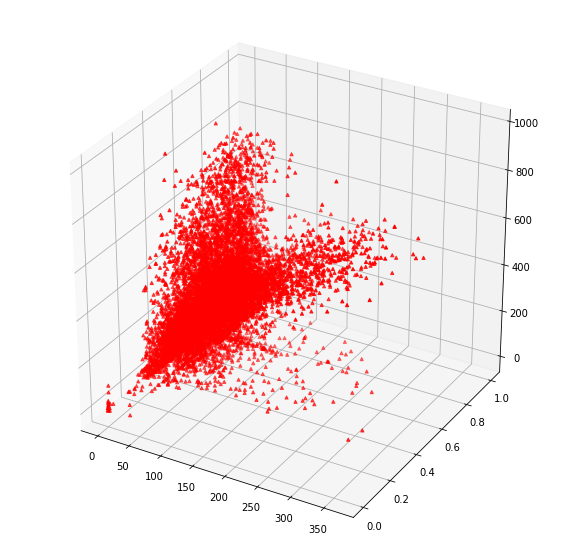

In [312]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(newBike['casual'], newBike['hum'], varDep, zdir = 'z', c = 'r', marker = '^', s = 10)

Obviamente, não há correlação linear sequer entre os dados

In [215]:
from sklearn.tree import DecisionTreeRegressor
DecisionTreeRegressor??

Init signature:
DecisionTreeRegressor(
    *,
    criterion='mse',
    splitter='best',
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,
    max_features=None,
    random_state=None,
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    min_impurity_split=None,
    presort='deprecated',
    ccp_alpha=0.0,
)
Source:        
class DecisionTreeRegressor(RegressorMixin, BaseDecisionTree):
    """A decision tree regressor.

    Read more in the :ref:`User Guide <tree>`.

    Parameters
    ----------
    criterion : {"mse", "friedman_mse", "mae"}, default="mse"
        The function to measure the quality of a split. Supported criteria
        are "mse" for the mean squared error, which is equal to variance
        reduction as feature selection criterion and minimizes the L2 loss
        using the mean of each terminal node, "friedman_mse", which uses mean
        squared error with Friedman's improvement score for potential splits

In [231]:
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict 
arvr = DecisionTreeRegressor(random_state = 42)

x = newBike.loc[:, ['hum','casual']]
y = newBike['cnt']

In [232]:
arvr.fit(x, y)

DecisionTreeRegressor(random_state=42)

In [233]:
prdctn = arvr.predict(x)

In [234]:
r2_score = r2(y, prdctn)
print('Coef de Determinação R: ', r2_score)

Coef de Determinação R:  0.6988987149618509


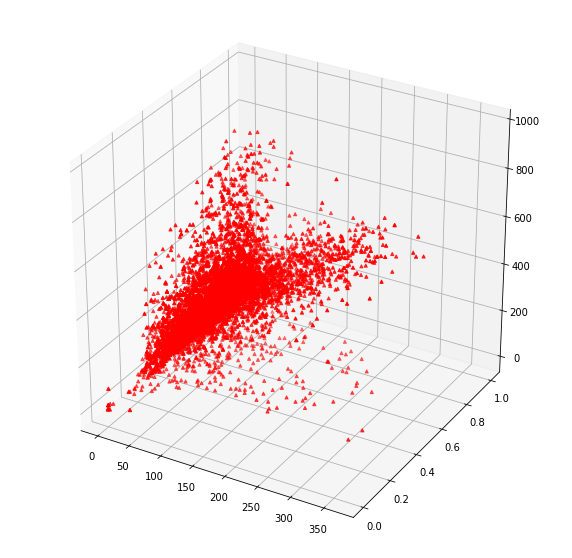

In [265]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize = (5,5))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(newBike['casual'], newBike['hum'], prdctn , c = 'r', marker = '^', s = 10)